In [24]:
%matplotlib inline

# NetCDF

A NetCDF file is made up of a few main components:
* Metadata
* Groups
* Dimensions
* Variables

In [29]:
# netCDF4 is the Python library for working with NetCDF files
import netCDF4 as nc
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 7]

#### Load the file using the Dataset object from the netCDF4 Library:

In [4]:
d = nc.Dataset('data/level1_7cf4_8c17_87af_7609_1fb9_c55c.nc', 'r') # set the filemode to 'r' for read

#### View global metadata:

In [6]:
print(d)

<type 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    calibration_directory: /home/bbasin/organized_cal/2017-11-07
    cdm_data_type: TimeSeries
    cdm_timeseries_variables: latitude, longitude
    Conventions: CF-1.6, COARDS, ACDD-1.3
    data_file_path: /data/Data/Instrument_data/BOP/2018/Raw/bb1_bop_2018-04-04_d_AA.raw
    featureType: TimeSeries
    geospatial_lat_units: degrees_north
    geospatial_lon_units: degrees_east
    history: Observational data from an undersea listening station
2018-04-13T14:35:50Z (local files)
2018-04-13T14:35:50Z http://belafonte.ocean.dal.ca:8080/erddap/tabledap/level1_7cf4_8c17_87af.nc?time,SATCTD7229_PRES,SATSTX0016_Aux&time%3E=2018-03-29T00%3A00%3A00Z&time%3C=2018-04-05T00%3A00%3A00Z&.draw=markers&.marker=5%7C5&.color=0x000000&.colorBar=%7C%7C%7C%7C%7C&.bgColor=0xffccccff
    id: level1_7cf4_8c17_87af_7609_1fb9_c55c
    infoUrl: ,https://www.dal.ca/diff/cerc/people/staff/davis.html,https://larochelab.

### Dimensions

If you think about NetCDF files as multi-dimensional matrices then NetCDF dimensions are equivalent to matrix dimensions. 

Many files(including all of ours) only have a single dimension. It's possible to use more dimensions to represent something like a timeseries of satellite images

In [10]:
for dim in d.dimensions:
    print('%s:\t %s'% (dim, d.dimensions[dim]))

row:	 <type 'netCDF4._netCDF4.Dimension'>: name = 'row', size = 1273



### Variables

Variables bundle together metadata attributes and data. Variables run along zero or more dimensions.

A variable with zero dimensions contains no data and is only being used to store metadata.

Variables use dimensions to relate to eachother.

In [11]:
# Variables contained in this file:
for v in d.variables:
    print(v)

time
SATCTD7229_PRES
SATSTX0016_Aux


##### Metadata attached to the variable

In [12]:
print d.variables['time']

<type 'netCDF4._netCDF4.Variable'>
float64 time(row)
    _CoordinateAxisType: Time
    actual_range: [  1.52285037e+09   1.52285066e+09]
    axis: T
    ioos_category: Time
    long_name: Datetime
    standard_name: time
    time_origin: 01-JAN-1970 00:00:00
    units: seconds since 1970-01-01T00:00:00Z
unlimited dimensions: 
current shape = (1273,)
filling off



##### Accessing some of the data in a variable:

In [18]:
print d.variables['time'][0:10]

[  1.52285037e+09   1.52285037e+09   1.52285038e+09   1.52285038e+09
   1.52285038e+09   1.52285038e+09   1.52285038e+09   1.52285038e+09
   1.52285039e+09   1.52285039e+09]


##### An observation about variables and dimensions:

In [17]:
print("Dimensions used by time:\t\t%s" % d.variables['time'].dimensions)
print("Dimensions used by SATCTD7229_PRES:\t%s" % d.variables['SATCTD7229_PRES'].dimensions)

Dimensions used by time:		row
Dimensions used by SATCTD7229_PRES:	row


Since dimensions are the same as the dimensions of a matrix and both variables are using the same dimension they must be the same length:

In [23]:
print("Lenght of time:\t\t\t%s" % len(d.variables['time']))
print("Length of SATCTD7229_PRES:\t%s" % len(d.variables['SATCTD7229_PRES']))

Lenght of time:			1273
Length of SATCTD7229_PRES:	1273


This means that you can use them for plotting and analysis:

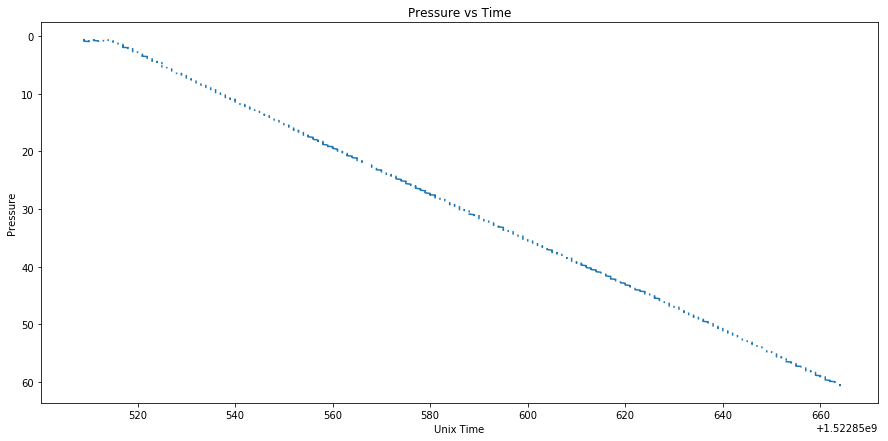

In [30]:
plt.plot(d.variables['time'][:], d.variables['SATCTD7229_PRES'][:])
plt.gca().invert_yaxis()
plt.title("Pressure vs Time")
plt.xlabel("Unix Time")
plt.ylabel("Pressure")
plt.show()

Since all variables on a dimension are the same length you can also convert them into a Pandas DataFrame

##### Converting into a Pandas DataFrame:

In [34]:
df = pd.DataFrame()

dimension = 'row'
for v in d.variables:
    if dimension in d.variables[v].dimensions:
        df[v] = d.variables[v][:]
print(df)

              time  SATCTD7229_PRES  SATSTX0016_Aux
0     1.522850e+09              NaN             NaN
1     1.522850e+09              NaN             NaN
2     1.522850e+09              NaN             NaN
3     1.522850e+09              NaN             NaN
4     1.522850e+09              NaN             NaN
5     1.522850e+09              NaN             NaN
6     1.522850e+09              NaN             NaN
7     1.522850e+09              NaN             NaN
8     1.522850e+09              NaN             NaN
9     1.522850e+09              NaN             NaN
10    1.522850e+09              NaN             NaN
11    1.522850e+09              NaN             NaN
12    1.522850e+09              NaN             NaN
13    1.522850e+09              NaN             NaN
14    1.522850e+09              NaN             NaN
15    1.522850e+09              NaN             NaN
16    1.522850e+09              NaN             NaN
17    1.522850e+09              NaN             NaN
18    1.5228

#### Another example with a different dataset:

In [36]:
# Load the dataset
d = nc.Dataset('data/otn200_20170802T1937Z_a755_2845_bd51_e1ca_6d36_6133.nc', 'r')

In [37]:
# Metadata:
print(d)

<type 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    cdm_data_type: Trajectory
    cdm_trajectory_variables: trajectory
    comment: battery_type:lithium, distance_traveled:1429.23
    contributor_name: Richard Davis, Adam Comeau, Jude van der Meer, Sue L'Orsa, Brad Covey
    contributor_role: Manager, Field Technician, Field Technician, Field Technician, Data Manager
    Conventions: CF-1.6, COARDS, ACDD-1.3
    creator_email: bradcovey@gmail.com
    creator_name: Brad Covey
    creator_url: http://gliders.oceantrack.org/index.php
    date_created: 2017-10-30T13:51:39Z
    date_issued: 2017-10-30T13:51:39Z
    date_modified: 2017-10-30T13:51:39Z
    Easternmost_Easting: 696970.15
    featureType: Trajectory
    format_version: IOOS_Glider_NetCDF_v2.0.nc
    geospatial_lat_max: 696970.15
    geospatial_lat_min: 42.5807966667
    geospatial_lat_units: degrees_north
    geospatial_lon_max: 696970.15
    geospatial_lon_min: -65.5312583333
   

In [38]:
# Dimensions:
for dim in d.dimensions:
    print('%s:\t%s' % (dim, d.dimensions[dim]))

row:	<type 'netCDF4._netCDF4.Dimension'>: name = 'row', size = 598727

trajectory_strlen:	<type 'netCDF4._netCDF4.Dimension'>: name = 'trajectory_strlen', size = 21



In [39]:
# Variables:
for v in d.variables:
    print(v)

trajectory
segment_id
profile_id
profile_time
profile_time_qc
profile_lon
profile_lon_qc
profile_lat
profile_lat_qc
time
time_qc
longitude
lon_qc
roll
roll_qc
pitch
pitch_qc
i_time
i_time_qc
heading
heading_qc
latitude
lat_qc
depth
depth_qc
conductivity
conductivity_qc
temperature
temperature_qc
pressure
pressure_qc
salinity
salinity_qc
density
density_qc


In [40]:
print d.variables['time']

<type 'netCDF4._netCDF4.Variable'>
float64 time(row)
    _CoordinateAxisType: Time
    accuracy: 1 second
    actual_range: [  1.50170267e+09   1.50893491e+09]
    ancillary_variables: time_qc
    axis: T
    calendar: gregorian
    colorBarMaximum: 2500000000.0
    colorBarMinimum: 0.0
    ioos_category: Time
    long_name: Time
    observation_type: measured
    precision: 1 second
    standard_name: time
    time_origin: 01-JAN-1970 00:00:00
    units: seconds since 1970-01-01T00:00:00Z
    valid_max: nan
    valid_min: 0.0
unlimited dimensions: 
current shape = (598727,)
filling off



In [41]:
# A string variable. Strings are funny in NetCDF
print d.variables['trajectory']

<type 'netCDF4._netCDF4.Variable'>
|S1 trajectory(row, trajectory_strlen)
    _Encoding: ISO-8859-1
    cf_role: trajectory_id
    comment: A trajectory is a single deployment of a glider and may span multiple data files.
    ioos_category: Identifier
    long_name: Trajectory/Deployment Name
unlimited dimensions: 
current shape = (598727, 21)
filling off



In [44]:
print d.variables['trajectory'][0]
print ''.join(d.variables['trajectory'][0])

['o' 't' 'n' '2' '0' '0' '-' '2' '0' '1' '7' '0' '8' '0' '2' 'T' '1' '9'
 '3' '7' 'Z']
otn200-20170802T1937Z


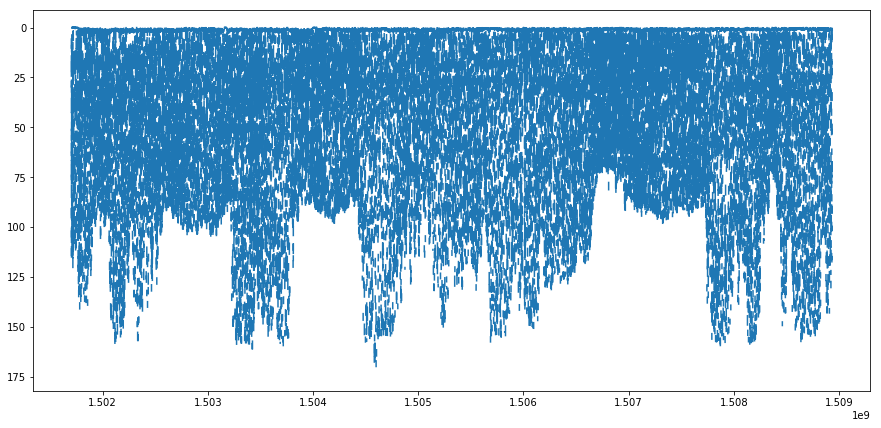

In [46]:
plt.plot(d.variables['time'], d.variables['depth'])
plt.gca().invert_yaxis()
plt.show()

In [49]:
df = pd.DataFrame()

dimension = 'row'
for v in d.variables:
    if dimension in d.variables[v].dimensions and len(d.variables[v].dimensions) == 1:
        df[v] = d.variables[v][:]
print(df)

        segment_id  profile_id  profile_time  profile_time_qc  profile_lon  \
0                1           1  1.501703e+09                0   -65.493575   
1                1           1  1.501703e+09                0   -65.493575   
2                1           1  1.501703e+09                0   -65.493575   
3                1           1  1.501703e+09                0   -65.493575   
4                1           1  1.501703e+09                0   -65.493575   
5                1           1  1.501703e+09                0   -65.493575   
6                1           1  1.501703e+09                0   -65.493575   
7                1           1  1.501703e+09                0   -65.493575   
8                1           1  1.501703e+09                0   -65.493575   
9                1           1  1.501703e+09                0   -65.493575   
10               1           1  1.501703e+09                0   -65.493575   
11               1           1  1.501703e+09                0   